In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
passenger_id = list(test_df['PassengerId'])

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


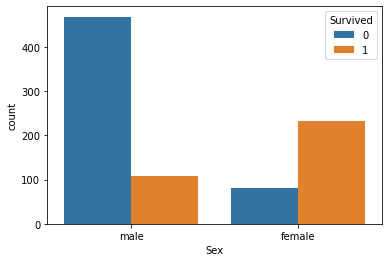

In [5]:
sns.countplot(data=train_df,x='Sex',hue='Survived');

Among dead there are 450 males and 90 females.
Among survived there are 100 males and 215 females

Most male died and most females survived

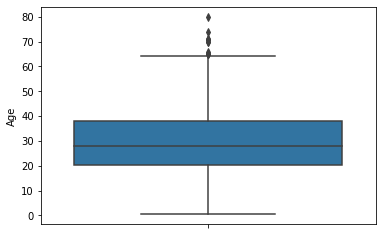

In [6]:
sns.boxplot(data=train_df,y='Age');

50 percent of people are ages between 20 and 37

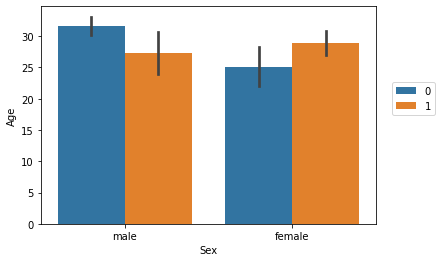

In [7]:
sns.barplot(data=train_df,x='Sex',y='Age',hue='Survived')
plt.legend(loc=(1.05,0.5));

There is no clear indication whether people in good age survived.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

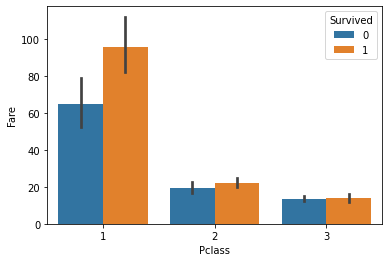

In [8]:
sns.barplot(data=train_df,x='Pclass',y='Fare',hue='Survived')

From the data we can see that survivors are majorly from 1st class

<AxesSubplot:>

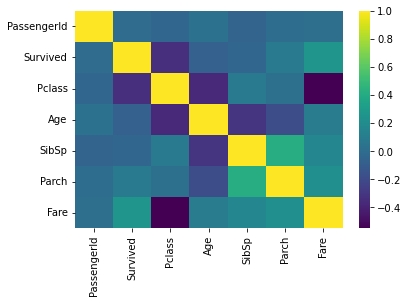

In [9]:
sns.heatmap(train_df.corr(),cmap='viridis')

From the heat map above we can see survived has negative correlation with Passanger class and somewhat ok correlation with fare

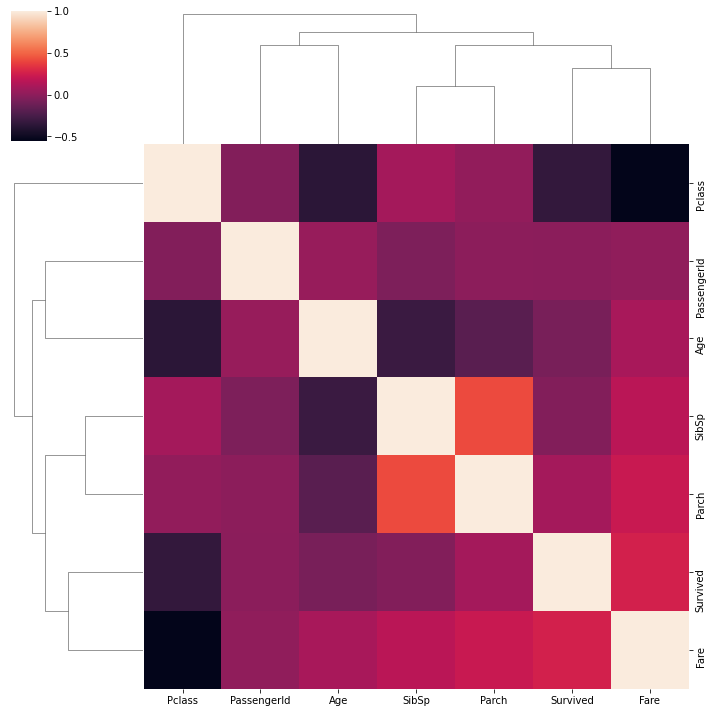

In [10]:
sns.clustermap(train_df.corr());

From Dendogram we can see survived and fare have good relations

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Info of the training data frame

In [12]:
test_df['Fare'].fillna(80,inplace=True)

In [13]:
test_df[test_df['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [14]:
train_df = train_df.drop(['PassengerId','Name','Ticket'],axis=1)
test_df = test_df.drop(['PassengerId','Name','Ticket'],axis=1)

In [15]:
train_df = train_df.drop(['Cabin','Embarked'],axis=1)
test_df = test_df.drop(['Cabin','Embarked'],axis=1)

In [16]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

In [17]:
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)
test_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [18]:
test_df.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       0
Family     0
dtype: int64

In [19]:
train_df['Fare']=train_df['Fare'].apply(lambda num : round(num))
test_df['Fare']=test_df['Fare'].apply(lambda num : round(num))

In [20]:
train_df.sample(10)

,Survived,Pclass,Sex,Age,Fare,Family
221,0,2,male,27.0,13,0
435,1,1,female,14.0,120,3
633,0,1,male,NaN,0,0
815,0,1,male,NaN,0,0
508,0,3,male,28.0,23,0
274,1,3,female,NaN,8,0
92,0,1,male,46.0,61,1
688,0,3,male,18.0,8,0
458,1,2,female,50.0,10,0
181,0,2,male,NaN,15,0


In [21]:
(train_df['Age'].append(test_df['Age'])).mean()

29.881137667304014

In [22]:
train_df['Age'].fillna(30,inplace=True)
test_df['Age'].fillna(30,inplace=True)

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,male,22.0,7,1
1,1,1,female,38.0,71,1
2,1,3,female,26.0,8,0
3,1,1,female,35.0,53,1
4,0,3,male,35.0,8,0


In [24]:
test_df.head()

,Pclass,Sex,Age,Fare,Family
0,3,male,34.5,8,0
1,3,female,47.0,7,1
2,2,male,62.0,10,0
3,3,male,27.0,9,0
4,3,female,22.0,12,2


In [25]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Family      0
dtype: int64

In [26]:
test_df.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
Family    0
dtype: int64

In [27]:
def gender(gender):
    if gender == 'male':
        return 0
    else:
        return 1

In [28]:
train_df['Sex'] = train_df['Sex'].apply(gender)

In [29]:
test_df['Sex'] = test_df['Sex'].apply(gender)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    int64  
 5   Family    891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   Fare    418 non-null    int64  
 4   Family  418 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 16.5 KB


Train,Test split and scaling

In [32]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_test_original = scaler.transform(test_df)

Finding the best value of 'k' using GridSearchCV

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
paramgrid = {
    'n_neighbors' : list(range(1,30)),
}
grid = GridSearchCV(estimator=knn_model,param_grid=paramgrid,cv=5,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [34]:
grid.best_params_

{'n_neighbors': 7}

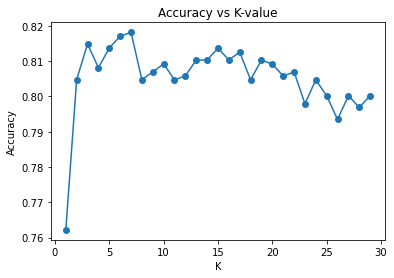

In [35]:
test_mean = grid.cv_results_['mean_test_score']
plt.plot(range(1,30),test_mean,marker='.',markeredgewidth=4)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K-value')
plt.show()

# I tried the models logistic,knn,Support Vector machines,Random forest,Ada boost,Gradient boost

# Of all them,KNN(n=7) gave me best accuracy because i think its a simple model.

In [36]:
test_predictions = grid.predict(scaled_X_test_original)

In [37]:
output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': test_predictions})

In [38]:
output.to_csv('submmsion_grid_.csv',index=False)

In [39]:
# from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

In [40]:
# X=train_df.drop('Survived',axis=1)
# y=train_df['Survived']

# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X)
# scaled_X_test = scaler.transform(test_df)

# from sklearn.svm import SVC
# model_svc = SVC()

# from sklearn.model_selection import GridSearchCV 
# param_grid ={
#     'C':[0.001,0.01,0.1,0.5,0.8,1.0],
#     'kernel':['linear','rbf','poly','sigmoid'],
#     'gamma':['auto','scale'],
#     'degree':[2,3,4],
# }
# grid = GridSearchCV(model_svc,param_grid,cv=5,scoring='accuracy')
# grid.fit(scaled_X_train,y)
# grid.best_params_

In [41]:
# estimators = [('dt', DecisionTreeClassifier(criterion="gini", max_depth=2)),('gb1',GradientBoostingClassifier(max_depth=2))]
# stc = StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier())
# stc.fit(X,y)

In [42]:
# from sklearn.tree import DecisionTreeClassifier
# model_dt = DecisionTreeClassifier()
# model_dt.fit(scaled_X_train,y_train)
# tp = model_dt.predict(scaled_X_test)

In [43]:
# X=train_df.drop('Survived',axis=1)
# y=train_df['Survived']
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# test_df_ = scaler.transform(test_df)
# from sklearn.linear_model import LogisticRegressionCV
# log_model = LogisticRegressionCV()
# log_model.fit(X,y)
# test_predictions = log_model.predict(test_df_)
# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': test_predictions})
# log_model.predict_proba(test_df_)
# test_predictions